In [18]:
import pandas as pd
from tqdm import tqdm, tqdm_notebook
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import plotly.graph_objs as go
import math
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
tqdm().pandas()

0it [00:00, ?it/s]


In [19]:
df = pd.read_csv('../dataset/cluster/2020-02-road7-in-5clusterp.csv', parse_dates=["datetime"])
df['label'] = df['cluster'].apply(lambda row: 1 if row == 1 else 0)
df


,datetime,km,all_units,inflow_units,outflow_unit,samecell_units,avg_speed,max_speed,avg_traveltime,max_traveltime,road_number,road_direction,inflow_units_N,outflow_units_N,avg_speed_N,cluster,label
0,2020-01-01 00:00:00,1.0,2.600000,2.400000,0.0,0.200000,83.750000,98.550000,45.350000,54.750000,7,in,0.080000,0.000000,0.802083,3,0
1,2020-01-01 00:30:00,1.0,2.956522,2.739130,0.0,0.217391,81.217391,99.347826,39.956522,47.956522,7,in,0.091304,0.000000,0.766908,3,0
2,2020-01-01 01:00:00,1.0,2.611111,2.555556,0.0,0.055556,84.388889,96.388889,45.500000,57.000000,7,in,0.085185,0.000000,0.810957,3,0
3,2020-01-01 01:30:00,1.0,2.761905,2.666667,0.0,0.095238,82.142857,96.666667,47.476190,55.619048,7,in,0.088889,0.000000,0.779762,3,0
4,2020-01-01 02:00:00,1.0,2.000000,1.826087,0.0,0.173913,80.521739,89.173913,39.695652,46.086957,7,in,0.060870,0.000000,0.757246,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181606,2020-01-31 21:30:00,124.0,1.000000,1.000000,1.0,0.000000,77.333333,77.333333,0.000000,0.000000,7,in,0.033333,0.030992,0.712963,3,0
181607,2020-01-31 22:00:00,124.0,1.000000,1.000000,0.5,0.000000,71.750000,71.750000,0.000000,0.000000,7,in,0.033333,0.015496,0.635417,3,0
181608,2020-01-31 22:30:00,124.0,1.000000,1.000000,0.0,0.000000,60.000000,60.000000,0.000000,0.000000,7,in,0.033333,0.000000,0.472222,0,0
181609,2020-01-31 23:00:00,124.0,1.000000,1.000000,0.0,0.000000,78.000000,78.000000,0.000000,0.000000,7,in,0.033333,0.000000,0.722222,3,0


In [20]:
df[df['label']==1]

,datetime,km,all_units,inflow_units,outflow_unit,samecell_units,avg_speed,max_speed,avg_traveltime,max_traveltime,road_number,road_direction,inflow_units_N,outflow_units_N,avg_speed_N,cluster,label
1653,2020-01-05 18:00:00,2.0,5.066667,4.866667,4.733333,0.200000,68.166667,80.366667,70.366667,97.000000,7,in,0.162222,0.146694,0.585648,1,1
1654,2020-01-05 18:30:00,2.0,5.900000,5.733333,5.766667,0.166667,69.466667,80.833333,63.933333,83.933333,7,in,0.191111,0.178719,0.603704,1,1
1820,2020-01-09 06:00:00,2.0,5.733333,5.366667,5.233333,0.366667,70.233333,88.933333,53.366667,64.400000,7,in,0.178889,0.162190,0.614352,1,1
1829,2020-01-09 10:30:00,2.0,9.357143,7.428571,8.928571,1.928571,51.857143,69.500000,63.785714,92.642857,7,in,0.247619,0.276712,0.359127,1,1
1870,2020-01-10 07:00:00,2.0,5.370370,4.703704,5.296296,0.666667,61.074074,85.259259,52.111111,66.000000,7,in,0.156790,0.164141,0.487140,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170385,2020-01-30 11:00:00,116.0,3.620690,3.172414,7.103448,0.448276,60.689655,73.344828,50.344828,54.896552,7,in,0.105747,0.220148,0.481801,1,1
170386,2020-01-30 11:30:00,116.0,3.689655,2.965517,7.620690,0.724138,61.000000,79.551724,43.931034,49.827586,7,in,0.098851,0.236178,0.486111,1,1
170387,2020-01-30 12:00:00,116.0,4.120000,3.440000,6.720000,0.680000,62.280000,81.520000,44.480000,51.800000,7,in,0.114667,0.208264,0.503889,1,1
170388,2020-01-30 12:30:00,116.0,3.821429,3.142857,6.678571,0.678571,61.214286,77.035714,50.142857,55.250000,7,in,0.104762,0.206981,0.489087,1,1


In [21]:
df_corr = df.filter(['all_units','inflow_units','outflow_unit','samecell_units','avg_speed','max_speed','avg_traveltime','max_traveltime','cluster','label'],axis=1)
corr = df_corr.corr()

<AxesSubplot:>

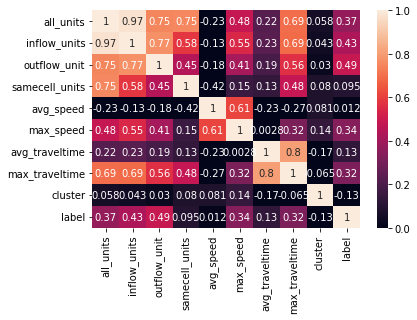

In [22]:
sns.heatmap(corr, vmin=0, vmax=1, annot=True)


In [23]:
d_cols = ['all_units','inflow_units','outflow_unit','max_speed','max_traveltime']

In [24]:
x = df[d_cols]
y = df['cluster']

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [26]:
tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)

DecisionTreeClassifier()

In [27]:
y_pred = tree.predict(x_test)

In [28]:
y_test.value_counts()

0    19207
3    12185
1     7876
4     3957
2     2178
Name: cluster, dtype: int64

In [29]:
from sklearn.metrics import accuracy_score,f1_score
print(accuracy_score(y_test, y_pred))

0.8636653965596987
